In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [41]:
zip_df = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')

In [42]:
vax_df = pd.read_csv('vaccine_with_protocol.csv')

In [43]:
zip_df.head(10)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1
5,3/11/2020,37210.0,1
6,3/11/2020,37212.0,2
7,3/11/2020,37214.0,1
8,3/11/2020,37215.0,3
9,3/12/2020,NaN,1


In [44]:
vax_df.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [45]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [46]:
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [47]:
zip_df.count()

Specimen Collection Date    8832
Zip                         8456
Cases                       8832
dtype: int64

In [48]:
vax_df.count()

vacc_date      6694
zipcode        6462
count_given    6686
dose_nbr       6686
protocol       6694
dtype: int64

In [49]:
pd.value_counts(zip_df['Cases'])

1      1453
2      1044
3       763
4       635
5       529
       ... 
91        1
83        1
146       1
114       1
179       1
Name: Cases, Length: 131, dtype: int64

In [50]:
pd.value_counts(zip_df['Zip'])

37013.0    382
37211.0    379
37209.0    364
37217.0    362
37115.0    361
37207.0    361
37076.0    357
37214.0    355
37203.0    344
37221.0    342
37206.0    340
37072.0    338
37208.0    338
37210.0    336
37205.0    330
37138.0    323
37218.0    321
37216.0    318
37215.0    317
37212.0    313
37204.0    306
37220.0    214
37189.0    211
37080.0    192
37228.0    168
37201.0    153
37219.0    140
37027.0    132
37213.0     43
37069.0     13
37238.0      3
Name: Zip, dtype: int64

In [51]:
vax_df.groupby('zipcode')['count_given'].sum()


zipcode
37013.0    27167.0
37027.0      506.0
37069.0       89.0
37072.0    13108.0
37076.0    16855.0
37080.0     3078.0
37115.0    12827.0
37138.0    10873.0
37189.0     1650.0
37201.0      756.0
37203.0    11678.0
37204.0     9723.0
37205.0    24451.0
37206.0    14310.0
37207.0    13888.0
37208.0     8262.0
37209.0    20553.0
37210.0     5493.0
37211.0    28477.0
37212.0    10877.0
37213.0      102.0
37214.0    13573.0
37215.0    19915.0
37216.0    10253.0
37217.0     8613.0
37218.0     6987.0
37219.0      891.0
37220.0     5190.0
37221.0    27622.0
37228.0     1040.0
37238.0        5.0
Name: count_given, dtype: float64

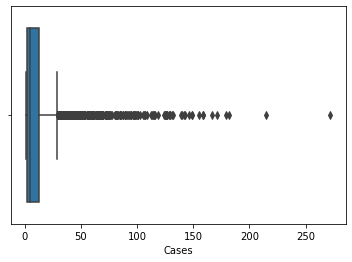

In [52]:
sns.boxplot(x=zip_df['Cases'])


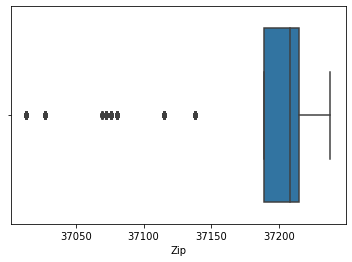

In [53]:
sns.boxplot(x=zip_df['Zip'])

In [54]:
zip_df.describe()

,Zip,Cases
count,8456.000000,8832.000000
mean,37177.833254,10.599977
std,61.642481,15.487583
min,37013.000000,1.000000
25%,37189.000000,2.000000
50%,37208.000000,5.000000
75%,37215.000000,13.000000
max,37238.000000,272.000000


In [55]:
zip_df.nlargest(10, ['Cases'])

,Specimen Collection Date,Zip,Cases
5592,11/23/2020,NaN,272
6760,1/4/2021,37013.0,215
5564,11/22/2020,NaN,182
6563,12/28/2020,37013.0,179
5968,12/7/2020,NaN,171
6789,1/5/2021,37013.0,167
1828,6/24/2020,37211.0,159
6593,12/29/2020,37013.0,159
5774,11/30/2020,NaN,155
5621,11/24/2020,NaN,149


In [56]:
most_vax_given = vax_df.groupby('zipcode')['count_given'].sum()


In [57]:
most_vax_df = pd.DataFrame(most_vax_given).reset_index()
most_vax_df.columns = ['zipcode', 'total_vaccines_given']
print(most_vax_df)


    zipcode  total_vaccines_given
0   37013.0               27167.0
1   37027.0                 506.0
2   37069.0                  89.0
3   37072.0               13108.0
4   37076.0               16855.0
5   37080.0                3078.0
6   37115.0               12827.0
7   37138.0               10873.0
8   37189.0                1650.0
9   37201.0                 756.0
10  37203.0               11678.0
11  37204.0                9723.0
12  37205.0               24451.0
13  37206.0               14310.0
14  37207.0               13888.0
15  37208.0                8262.0
16  37209.0               20553.0
17  37210.0                5493.0
18  37211.0               28477.0
19  37212.0               10877.0
20  37213.0                 102.0
21  37214.0               13573.0
22  37215.0               19915.0
23  37216.0               10253.0
24  37217.0                8613.0
25  37218.0                6987.0
26  37219.0                 891.0
27  37220.0                5190.0
28  37221.0   

In [58]:
education = pd.read_csv('education_by_zip.csv')

In [59]:
education.nlargest(5, ['5th and 6th grade'])

,Zipcode,Total:,High school graduate (includes equivalency),Bachelors degree,"Some college, 1 or more years, no degree",Associates degree,Masters degree,"Some college, less than 1 year",No schooling completed,"12th grade, no diploma",Professional school degree,5th and 6th grade,7th and 8th grade,10th grade,9th grade,11th grade,Nursery to 4th grade,Doctorate degree
18,37211,52117,11897,12916,6621,2937,4999,2007,1528,1122,811,1273,1504,1015,1334,775,738,640
0,37013,62355,15971,14323,9466,5652,4860,3147,1822,1386,1055,951,705,894,821,638,355,309
6,37115,27433,9319,3425,4258,1966,1417,1676,633,576,238,565,604,595,696,1001,344,120
14,37207,25832,8857,3745,4230,1443,1319,1545,580,730,178,385,459,586,496,954,88,237
17,37210,10895,3167,2199,1507,630,432,498,261,375,162,319,164,268,394,319,106,94


In [60]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Zipcode                                      30 non-null     int64
 1   Total:                                       30 non-null     int64
 2   High school graduate (includes equivalency)  30 non-null     int64
 3   Bachelors degree                             30 non-null     int64
 4   Some college, 1 or more years, no degree     30 non-null     int64
 5   Associates degree                            30 non-null     int64
 6   Masters degree                               30 non-null     int64
 7   Some college, less than 1 year               30 non-null     int64
 8   No schooling completed                       30 non-null     int64
 9   12th grade, no diploma                       30 non-null     int64
 10  Professional school degree  

In [61]:
education.head()

,Zipcode,Total:,High school graduate (includes equivalency),Bachelors degree,"Some college, 1 or more years, no degree",Associates degree,Masters degree,"Some college, less than 1 year",No schooling completed,"12th grade, no diploma",Professional school degree,5th and 6th grade,7th and 8th grade,10th grade,9th grade,11th grade,Nursery to 4th grade,Doctorate degree
0,37013,62355,15971,14323,9466,5652,4860,3147,1822,1386,1055,951,705,894,821,638,355,309
1,37027,36625,2744,16139,2887,1693,7717,1215,112,129,2137,37,139,105,72,47,11,1441
2,37069,13385,1048,5901,1419,615,2514,504,23,89,750,10,39,9,0,24,0,440
3,37072,22679,6735,4367,3424,1801,1491,1947,256,427,360,161,353,306,259,426,68,298
4,37076,28788,6816,7658,4458,2649,2296,1855,272,433,473,110,60,403,377,399,141,388


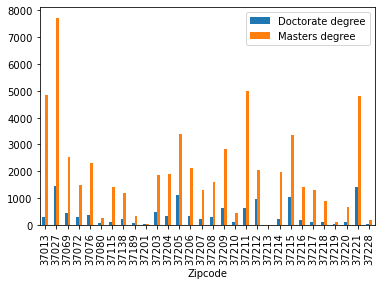

In [62]:
education.plot.bar('Zipcode', ['Doctorate degree','Masters degree'])

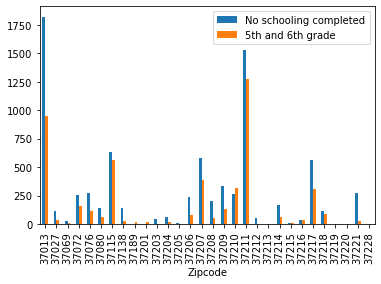

In [63]:
education.plot.bar('Zipcode',['No schooling completed','5th and 6th grade'])